# SCS3201 Machine Learning and Neural Computing
Assignment 01
[18001963]



## **Predicting Temporal Order Of A flight From Leak-check Pressure And Launch Temperature**

## Import Libraries

In [104]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

## Read Dataset

In [105]:
data = np.genfromtxt('/content/o-ring-erosion-only.data', delimiter=',')

In [106]:
data.shape

(23, 5)

## Normalize Data

In [107]:
data = normalize(data, axis=0)

## Seperate Data

In [108]:
X = data[:, 0:4]
Y = data[:, 4:]

## Visualize Data

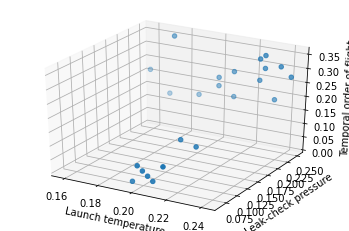

In [109]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 2]
ys = X[:, 3]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Launch temperature')
ax.set_ylabel('Leak-check pressure')
ax.set_zlabel('Temporal order of flight')

plt.show()

## Define Hyperparameters

In [110]:
learning_rate = 0.09
max_iteration = 500

In [111]:
s_learning_rate = 0.06
s_max_iteration = 500

In [112]:
mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

## Parameters

In [113]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

## Hypothesis

In [114]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

## Loss Function

In [115]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

## Calculate Gradients


In [116]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

## Batch Gradient Descent



In [117]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Mini-Batch Gradient Descent



In [118]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Stochastic Gradient Descent

In [119]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Train Model

In [120]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.018466548689964803
iteration :  100  loss :  0.004470599247245043
iteration :  200  loss :  0.004123948340510474
iteration :  300  loss :  0.0038150304384996885
iteration :  400  loss :  0.003539728957800706


In [121]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.004832262422629631
iteration :  100  loss :  0.00208479228692933
iteration :  200  loss :  0.0014777944375495165
iteration :  300  loss :  0.0013900532176011826
iteration :  400  loss :  0.001381836637589086


In [122]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.014727948477987219
iteration :  100  loss :  0.004765799277428234
iteration :  200  loss :  0.004118433964669825
iteration :  300  loss :  0.0035937522997802228
iteration :  400  loss :  0.0031680104105900266


## Optimal values of Parameters using Trained Model

In [123]:
theta

array([[ 0.11565049],
       [ 0.02411479],
       [-0.01661908],
       [ 0.04416441],
       [ 0.28919668]])

In [124]:
s_theta

array([[-0.03570108],
       [-0.00744419],
       [-0.10950409],
       [ 0.1206778 ],
       [ 1.14357878]])

In [125]:
mb_theta

array([[ 0.10650679],
       [ 0.0222082 ],
       [-0.05021264],
       [ 0.06194486],
       [ 0.4863235 ]])

## Cost vs Iteration Plots

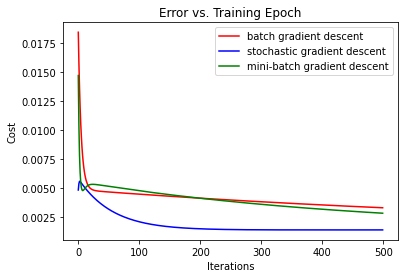

In [126]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()